In [9]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [10]:
from plotnine.data import msleep

In [12]:
data = msleep
data

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
...,...,...,...,...,...,...,...,...,...,...,...
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.00250,0.104
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,NaN,NaN,18.8,NaN,173.330
80,Genet,Genetta,carni,Carnivora,NaN,6.3,1.3,NaN,17.7,0.01750,2.000
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.04450,3.380


In [13]:
data['vore'] = data['vore'].astype(object)

In [14]:
statistics.mode(data['vore'])
data['vore'] = data['vore'].replace(np.nan, 'herbi')

In [15]:
data['conservation'] = data['conservation'].astype(object)

In [16]:
data['sleep_rem'] = data['sleep_rem'].replace(np.nan, 0)

In [17]:
data['sleep_rem'].replace([0], data['sleep_rem'].mean(), inplace=True)

In [18]:
data['sleep_cycle'] = data['sleep_cycle'].replace(np.nan, 0)

In [19]:
data['sleep_cycle'].replace([0], data['sleep_cycle'].mean(), inplace=True)

In [20]:
data['brainwt'] = data['brainwt'].replace(np.nan, 0)
data['brainwt'].replace([0], data['brainwt'].mean(), inplace=True)

In [21]:
data

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,1.378313,0.169478,11.9,0.189983,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.800000,0.169478,7.0,0.015500,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.400000,0.169478,9.6,0.189983,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.300000,0.133333,9.1,0.000290,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.700000,0.666667,20.0,0.423000,600.000
...,...,...,...,...,...,...,...,...,...,...,...
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.600000,0.233333,15.1,0.002500,0.104
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,1.378313,0.169478,18.8,0.189983,173.330
80,Genet,Genetta,carni,Carnivora,NaN,6.3,1.300000,0.169478,17.7,0.017500,2.000
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,1.378313,0.169478,11.5,0.044500,3.380


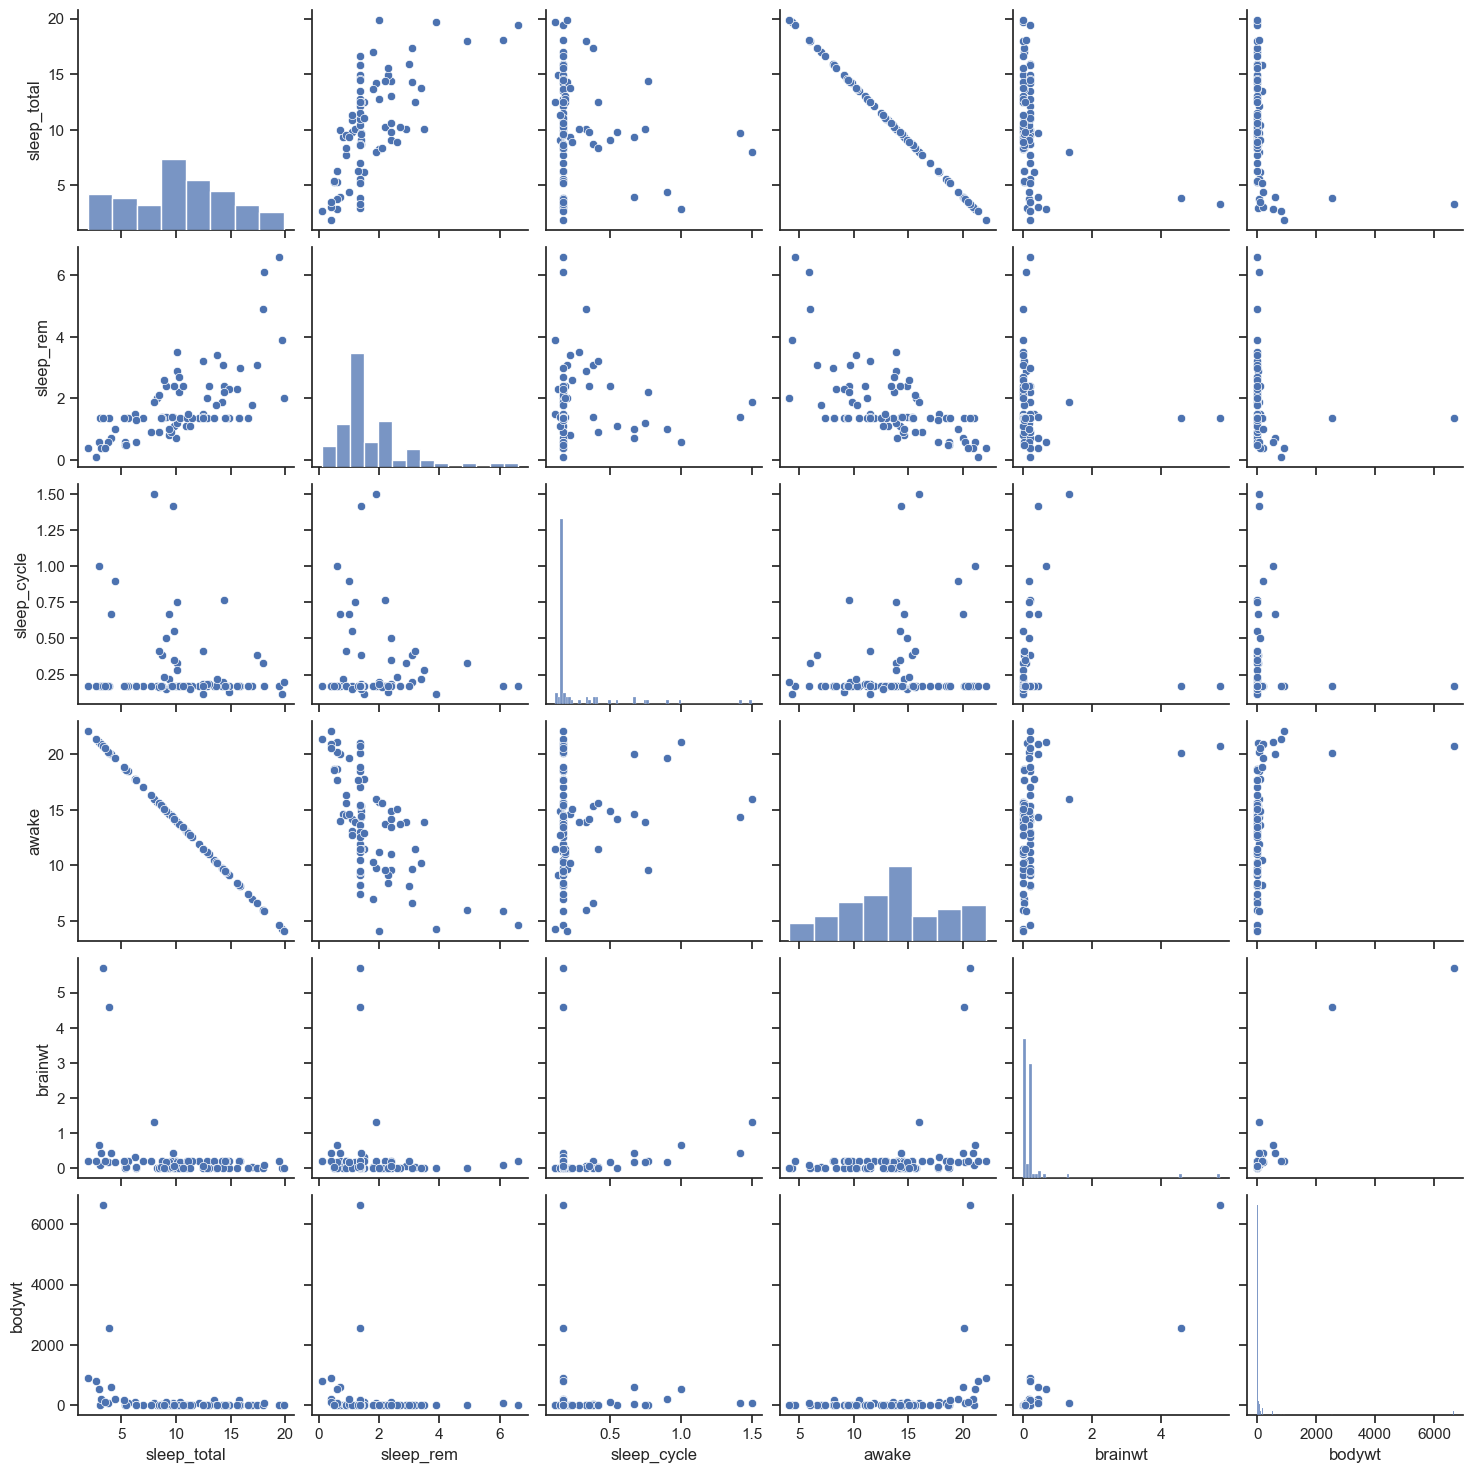

In [22]:
#Visualiasi korelasi antar variabel float pada data
sns.set(style="ticks", color_codes=True)    
df= data
g = sns.pairplot(df)
plt.show()

Berdasarkan visualiasi diatas didapatkan informasi bahwa:
* Terdapat korelasi negatif yang kuat antara "sleep_total" dan "awake" yang berarti semakin tinggi nilai "sleep_total" maka nilai "awake" semakin kecil dan sebaliknya. Insigth ini masuk akal karena jika suatu mamalia waktu tidur nya banyak maka waktu terjaganya sedikit.
* Terdapat korelasi lemah mengarah ke positif yang terjadi antara  "bodywt" dan "brainwt" yang berarti semakin besar massa dari suatu mamalia maka massa otaknya juga besar.
* Tidak terdapat korelasi pada pasangan fitur lainnya yang berarti tidak ada hubungan sebab akibat yang terjadi antar fitur.

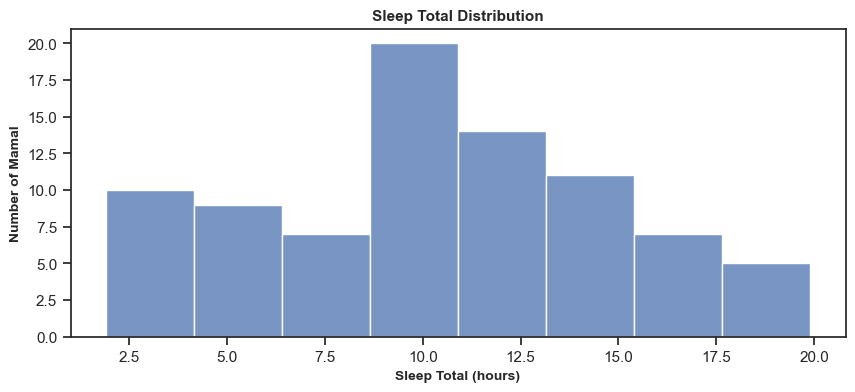

In [23]:
plt.figure(figsize=(10, 4))
sns.histplot(data['sleep_total'])
plt.xlabel("Sleep Total (hours)", fontsize=10, fontweight='bold')
plt.ylabel("Number of Mamal", fontsize=10, fontweight='bold')
plt.title('Sleep Total Distribution', fontsize=11, fontweight='bold')
plt.show()

Berdasarkan visualisasi diatas didapat informasi sebagai berikut:
* Kebanyakan mamalia memiliki total waktu tidur disekitaran 10 jam  
* Distribusi waktu tidur mamalia berkisar antara 2 - 20 jam 

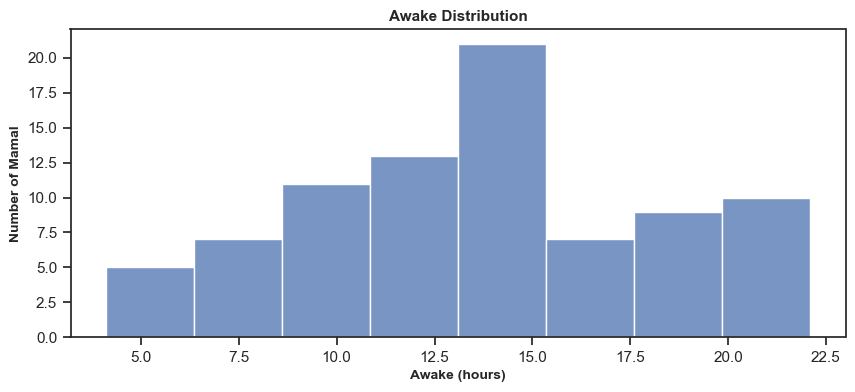

In [24]:
plt.figure(figsize=(10, 4))
sns.histplot(data['awake'])
plt.xlabel("Awake (hours)", fontsize=10, fontweight='bold')
plt.ylabel("Number of Mamal", fontsize=10, fontweight='bold')
plt.title('Awake Distribution', fontsize=11, fontweight='bold')
plt.show()

Berdasarkan visualisasi diatas didapat informasi sebagai berikut:
* Kebanyakan mamalia memiliki waktu terjaga disekitaran 13 sampai 15 jam
* Distribusi waktu tidur mamalia berkisar antara 2.5 jam  sampai kurang dari 22.5 jam

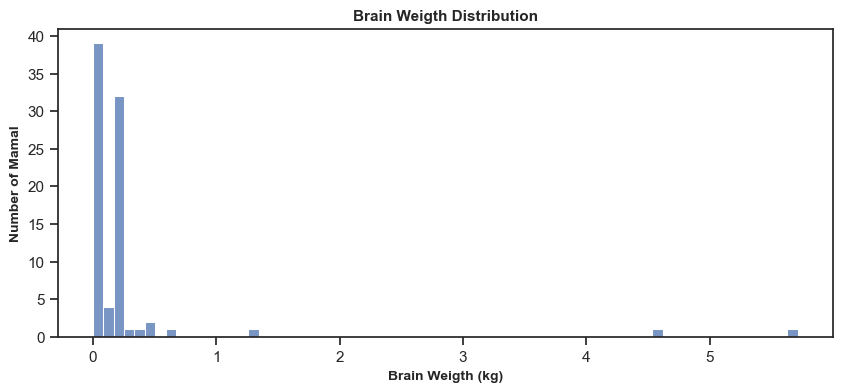

In [40]:
plt.figure(figsize=(10, 4))
sns.histplot(data['brainwt'])
plt.xlabel("Brain Weigth (kg)", fontsize=10, fontweight='bold')
plt.ylabel("Number of Mamal", fontsize=10, fontweight='bold')
plt.title('Brain Weigth Distribution', fontsize=11, fontweight='bold')
plt.show()

Berdasarkan visualisasi diatas didapat informasi bahwa terdapat 2 outliers pada distribusi massa otak mamalia sedangkan data lainnya terletak dibawah 1000 gram

Untuk melihat lebih detail distribusi massa otak mamalia pada data dominan dibentuk visualisasi sebagai berikut:

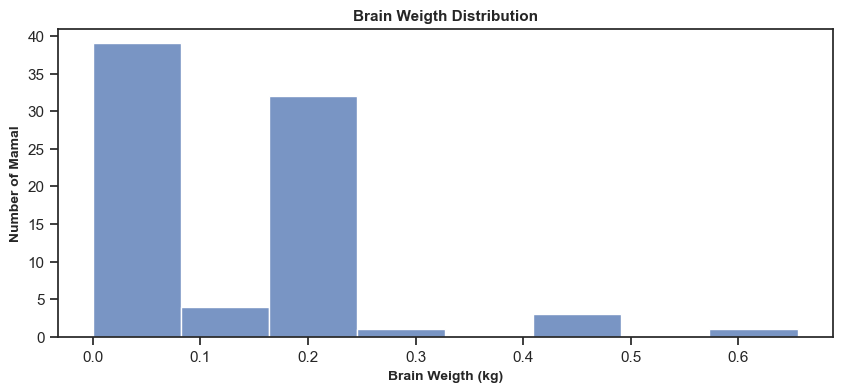

In [41]:
plt.figure(figsize=(10, 4))
sns.histplot(data[data['brainwt'] < 1]["brainwt"])
plt.xlabel("Brain Weigth (kg)", fontsize=10, fontweight='bold')
plt.ylabel("Number of Mamal", fontsize=10, fontweight='bold')
plt.title('Brain Weigth Distribution', fontsize=11, fontweight='bold')
plt.show()

Berdasarkan visualisasi diatas didapatkan informasi bahwa kebanyakan mamalia memiliki massa otak berkisar diatas 0 gram sampai dibawah 100 gram

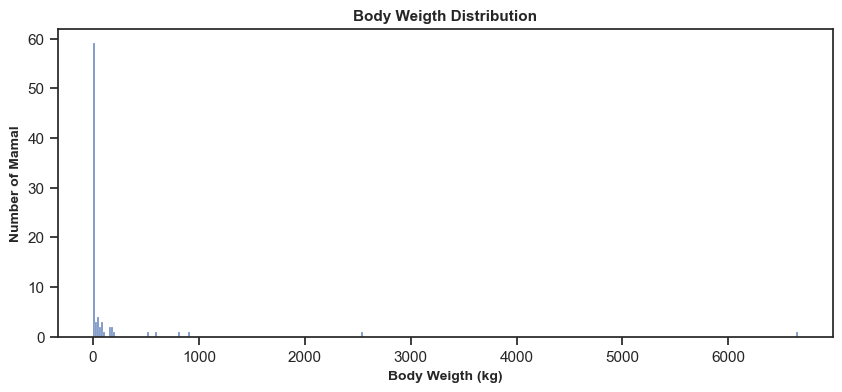

In [27]:
plt.figure(figsize=(10, 4))
sns.histplot(data['bodywt'])
plt.xlabel("Body Weigth (kg)", fontsize=10, fontweight='bold')
plt.ylabel("Number of Mamal", fontsize=10, fontweight='bold')
plt.title('Body Weigth Distribution', fontsize=11, fontweight='bold')
plt.show()

Berdasarkan visualisasi diatas dapat dilihat bahwa terdapat outliers dimana massa badan mamalia jauh dari distribusi normal yaitu diatas 2000 kg.

Untuk melihat lebih detail distribusi massa badan mamalia pada data dominan dibentuk visualisasi sebagai berikut:

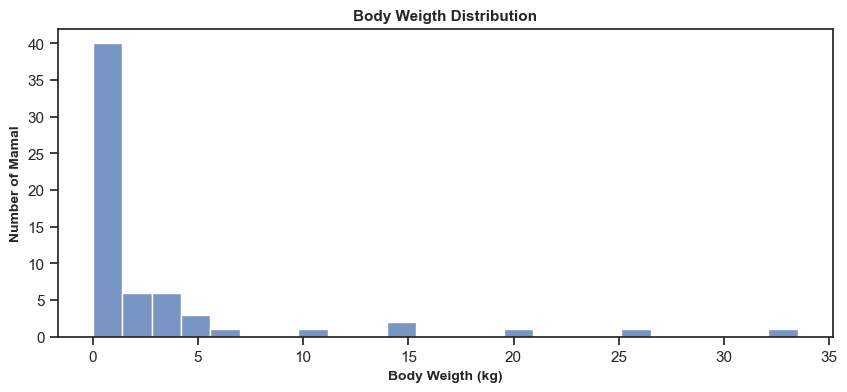

In [28]:
plt.figure(figsize=(10, 4))
sns.histplot(data[data['bodywt'] < 50]["bodywt"])
plt.xlabel("Body Weigth (kg)", fontsize=10, fontweight='bold')
plt.ylabel("Number of Mamal", fontsize=10, fontweight='bold')
plt.title('Body Weigth Distribution', fontsize=11, fontweight='bold')
plt.show()

Berdasarkan visualisasi diatas didapatkan informasi bahwa kebanyakan mamalia memiliki massa badan berkisar diatas 0 kg  sampai dibawah 5 kg

In [29]:
datas = (
    data.groupby(["name"])[["sleep_total"]]
    .sum()
    .sort_values(["sleep_total"], ascending=False)
    .reset_index()
) 

In [30]:
datas['Total'] = datas.sleep_total
datas.head(10)

,name,sleep_total,Total
0,Little brown bat,19.9,19.9
1,Big brown bat,19.7,19.7
2,Thick-tailed opposum,19.4,19.4
3,Giant armadillo,18.1,18.1
4,North American Opossum,18.0,18.0
5,Long-nosed armadillo,17.4,17.4
6,Owl monkey,17.0,17.0
7,Arctic ground squirrel,16.6,16.6
8,Golden-mantled ground squirrel,15.9,15.9
9,Eastern american chipmunk,15.8,15.8


In [32]:
top_nocs = datas.head(10)
# Bar plot
fig = px.bar(
    top_nocs.sort_values(["sleep_total"], ascending=True),
    y="name",
    x=["sleep_total"],
    orientation="h",
    color_discrete_sequence=["#FCE22A"],
    title="10 Mammals with The Most Sleep Time",
).update_layout(xaxis={"title": "Sleep Total"})
# to add the text of total medals for each noc
fig.add_trace(
    go.Scatter(
        y=top_nocs.sort_values(["sleep_total"], ascending=True).name,
        x=top_nocs.sort_values(["sleep_total"], ascending=True).Total,
        text=top_nocs.sort_values(["sleep_total"], ascending=True).Total,
        mode="text",
        textposition="bottom right",
        textfont=dict(
            size=13,
        ),
        showlegend=False,
    )
)
fig.show()

Berdasarkan visualisasi diatas dapat disimpulkan bahwa LITTLE BROWN BAT merupakan mamalia dengan waktu tidur terbanyak yaitu sebesar 19.9 jam.

In [33]:
dataz = (
    data.groupby(["name"])[["awake"]]
    .sum()
    .sort_values(["awake"], ascending=False)
    .reset_index()
)

In [34]:
dataz['Total'] = dataz.awake
dataz.head(10)

,name,awake,Total
0,Giraffe,22.10,22.10
1,Pilot whale,21.35,21.35
2,Horse,21.10,21.10
3,Roe deer,21.00,21.00
4,Donkey,20.90,20.90
5,African elephant,20.70,20.70
6,Caspian seal,20.50,20.50
7,Sheep,20.20,20.20
8,Asian elephant,20.10,20.10
9,Cow,20.00,20.00


In [35]:
top_nocs = dataz.head(10)
# Bar plot
fig = px.bar(
    top_nocs.sort_values(["awake"], ascending=True),
    y="name",
    x=["awake"],
    orientation="h",
    color_discrete_sequence=["#CD5888"],
    title="10 Mammals with The Most Aweak Time",
).update_layout(xaxis={"title": "Aweak Count"}, legend={"title": "Aweak"})
fig.add_trace(
    go.Scatter(
        y=top_nocs.sort_values(["awake"], ascending=True).name,
        x=top_nocs.sort_values(["awake"], ascending=True).Total,
        text=top_nocs.sort_values(["awake"], ascending=True).Total,
        mode="text",
        textposition="bottom right",
        textfont=dict(
            size=13,
        ),
        showlegend=False,
    )
)
fig.show()

Berdasarkan visualisasi diatas didapatkan informasi bahwa GIRAFFE merupakan mamalia dengan waktu terjaga terbesar yaitu 22.1 jam

Untuk membuktikan bahwa terdapat korelasi negatif antara waktu tidur dan waktu terjaga, dibawah ini disajikan 10 hewan dengan waktu terjaga paling sedikit 

In [37]:
top_nocs = dataz.tail(10)
# Bar plot
fig = px.bar(
    top_nocs.sort_values(["awake"], ascending=False),
    y="name",
    x=["awake"],
    orientation="h",
    color_discrete_sequence=["#CD5888"],
    title="10 Mammals with The Least Aweak Time",
).update_layout(xaxis={"title": "Aweak Count"}, legend={"title": "Aweak"})
fig.add_trace(
    go.Scatter(
        y=top_nocs.sort_values(["awake"], ascending=True).name,
        x=top_nocs.sort_values(["awake"], ascending=True).Total,
        text=top_nocs.sort_values(["awake"], ascending=True).Total,
        mode="text",
        textposition="bottom right",
        textfont=dict(
            size=13,
        ),
        showlegend=False,
    )
)
fig.show()

Berdasarkan visualiasi diatas didapatkan informasi bahwa peringkat 1 sampai 9 mamalia dengan waktu terjaga paling sedikit itu peringkatnya sama dengan mamalia dengan waktu tidur terbanyak sehingga korelasi negatif kuat yang terjadi antara waktu tidur dan waktu terjaga terbukti benar.